In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib  as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd 
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df  = pd.read_csv("appliances\energydata_complete.csv")

In [ ]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('date'), format='%d-%m-%Y %H:%M')

In [ ]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
5,50,40,19.890000,46.026667,19.200000,44.500000,19.79,44.933333,18.890000,45.730000,...,17.00,45.29,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484
11,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.000000,46.430000,...,16.89,45.29,5.98,734.433333,91.166667,5.833333,40.000000,4.62,8.827838,8.827838
17,70,30,20.856667,53.660000,20.200000,47.056667,20.20,48.447500,18.890000,47.963333,...,16.89,45.29,6.00,735.083333,88.500000,6.000000,40.000000,4.18,49.595305,49.595305
23,110,40,21.100000,46.596667,20.356667,44.963333,20.29,46.633333,19.390000,48.426667,...,16.89,45.00,6.00,735.366667,87.166667,6.000000,40.000000,3.93,6.277755,6.277755
29,100,20,21.500000,45.333333,20.700000,44.933333,20.39,46.060000,19.566667,48.466667,...,16.89,44.70,5.67,735.733333,87.833333,6.000000,40.000000,3.73,17.017450,17.017450


Here is the evolution of a few features 
over time:

<ipython-input-49-c7303c595bb4>:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_features.index = date_time[:480]


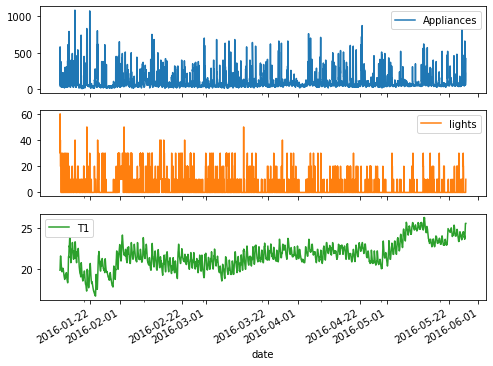

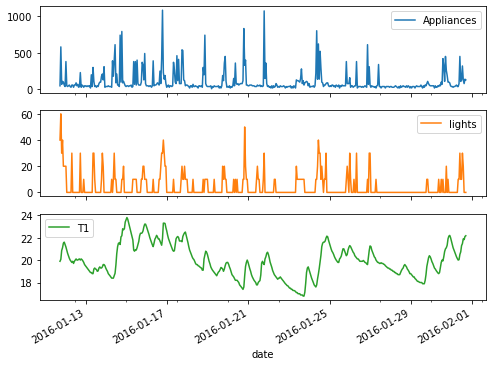

In [ ]:
plot_cols = ['Appliances','lights','T1']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,3289.0,99.391912,107.616547,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,3289.0,3.821830,7.897218,0.000000,0.000000,0.000000,0.000000,60.000000
T1,3289.0,21.687700,1.605607,16.790000,20.760000,21.600000,22.600000,26.200000
RH_1,3289.0,40.255253,3.984823,27.430000,37.326667,39.626667,43.030000,56.556667
T2,3289.0,20.341587,2.193960,16.100000,18.790000,20.000000,21.500000,29.533333
RH_2,3289.0,40.421202,4.069089,20.893333,37.863333,40.500000,43.230000,54.656667
T3,3289.0,22.268169,2.005930,17.260000,20.790000,22.100000,23.323333,29.198571
RH_3,3289.0,39.240831,3.257617,29.000000,36.900000,38.530000,41.730000,49.800000
T4,3289.0,20.855877,2.042768,15.100000,19.500000,20.633333,22.100000,26.100000
RH_4,3289.0,39.027752,4.341477,28.856667,35.560000,38.400000,42.193333,51.090000


In [ ]:
df[df['T6']<0] = 0.0
df[df['T_out']<0] = 0.0
df[df['Tdewpoint']<0] = 0.0


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,...,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000
mean,81.979325,3.104287,18.226261,33.980355,17.183224,34.026981,18.782648,32.883747,17.551698,33.012658,...,16.452883,34.961722,7.147789,627.653468,66.574930,3.499510,31.628458,4.127962,20.634187,20.634187
std,100.990554,7.278882,8.330899,15.719957,7.989047,15.773115,8.645170,15.113870,8.120899,15.375357,...,7.633619,16.209858,5.448662,282.605457,32.918845,2.749410,17.547778,3.665095,16.137441,16.137441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,20.000000,36.000000,18.200000,35.634000,20.200000,35.500000,18.700000,34.254000,...,17.100000,36.930000,2.870000,745.166667,57.500000,1.166667,24.166667,0.900000,5.182275,5.182275
50%,60.000000,0.000000,21.500000,39.363333,19.790000,40.200000,22.000000,38.090000,20.463333,38.163333,...,19.200000,40.363333,6.750000,753.066667,79.666667,3.000000,38.000000,3.450000,19.356635,19.356635
75%,90.000000,0.000000,22.600000,43.030000,21.460000,43.230000,23.290000,41.566364,22.072500,42.090000,...,20.600000,44.276000,10.400000,758.700000,90.833333,5.000000,40.000000,6.570000,34.788994,34.788994
max,870.000000,60.000000,26.200000,56.556667,29.533333,54.656667,29.198571,49.800000,26.100000,51.090000,...,24.500000,53.223333,25.800000,770.666667,100.000000,13.000000,66.000000,15.300000,49.972770,49.972770


In [ ]:
column_indices={name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df= df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean=train_df.mean()
train_std=train_df.std()

train_df = (train_df-train_mean)/train_std
val_df = (val_df-train_mean)/train_std
test_df = (test_df - train_mean)/train_std

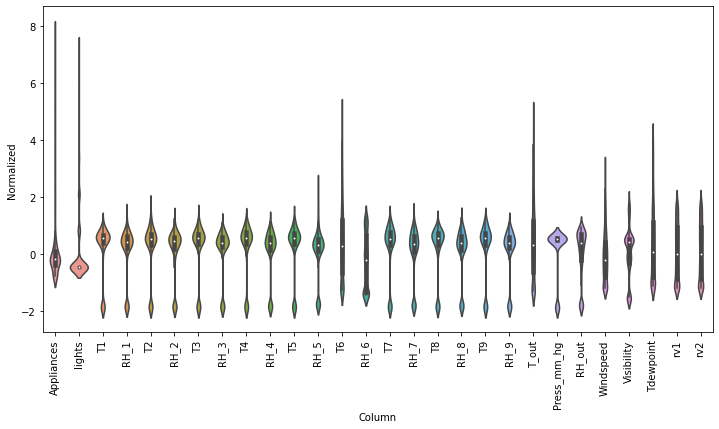

In [ ]:
df_std = (df-train_mean)/train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax=sns.violinplot(x='Column',y='Normalized', data=df_std)
_=ax.set_xticklabels(df.keys(),rotation=90)

In [ ]:
class  WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, 
                 val_df=val_df, test_df=test_df,label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in 
                                         enumerate(label_columns)}
        self.column_indices = {name: i for i, name in 
                              enumerate(train_df.columns)}
        
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24,label_width=1,shift=24,label_columns=['Appliances'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Appliances']

In [ ]:
w2 = WindowGenerator(input_width=6,label_width=1,shift=1,label_columns=['Appliances'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Appliances']

In [ ]:
def split_window(self, features):
    inputs  = features[:,self.input_slice,:]
    labels = features[:,self.labels_slice,:]
    if self.label_columns is not None:
        labels = tf.stack(
        [labels[:,:,self.column_indices[name]] for name in self.label_columns],
        axis=-1)
        
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    
    inputs.set_shape([None, self.input_width,None])
    labels.set_shape([None, self.label_width,None])
    
    return inputs, labels

WindowGenerator.split_window= split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 28)
Inputs shape: (3, 6, 28)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs,example_labels

In [ ]:
def plot(self, model=None, plot_col='Appliances', max_subplots =3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

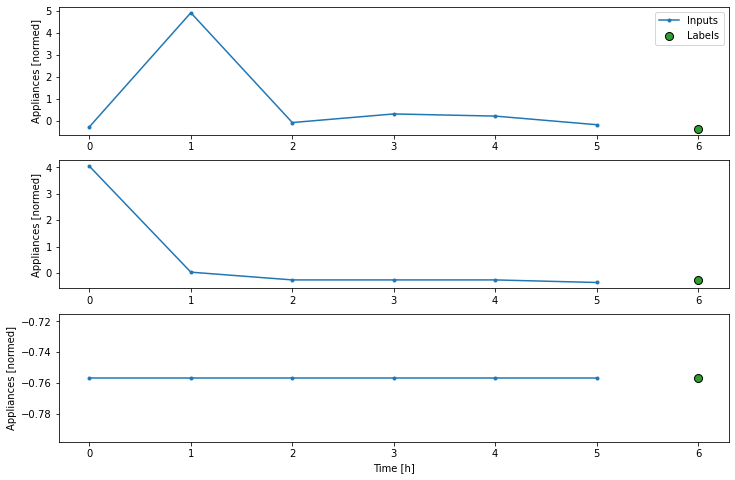

In [ ]:
w2.plot()

In [ ]:
# baseline = Baseline(label_index=column_indices['Appliances'])

# baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
#                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [ ]:
def make_dataset(self, data):
    data= np.array(data, dtype=np.float32)
    ds=tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,
    )
    
    ds=ds.map(self.split_window)
    
    return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 28), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs,example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labdels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 28)
Labdels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window=WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Appliances']
)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Appliances']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 28)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['Appliances'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance={}
performance={}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline']=baseline.evaluate(single_step_window.test, verbose=0)

21/21 [==============================] - 0s 1ms/step - loss: 1.2015 - mean_absolute_error: 0.4879


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Appliances'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Appliances']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 28)
Output shape: (32, 24, 1)


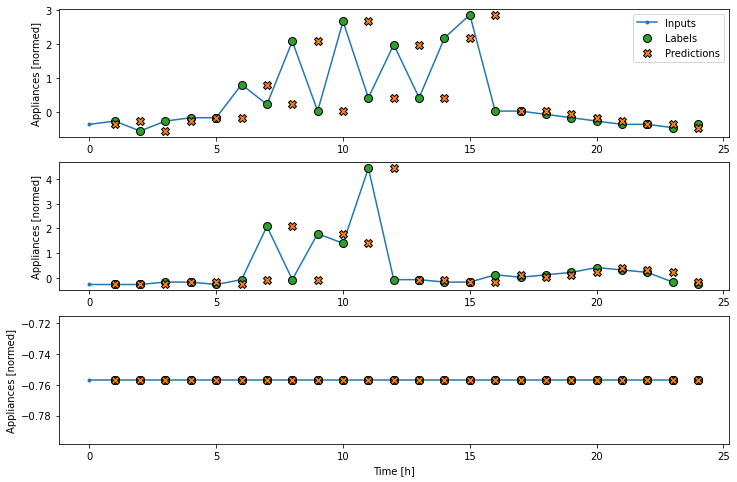

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 28)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS  =20

def compile_and_fit(model,window, patience=2):
    early_stopping  = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train,epochs=MAX_EPOCHS,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear']=linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test,verbose=0)

Epoch 1/20
72/72 [==============================] - 1s 5ms/step - loss: 2.3948 - mean_absolute_error: 1.2757 - val_loss: 1.2719 - val_mean_absolute_error: 0.7215
Epoch 2/20
72/72 [==============================] - 0s 2ms/step - loss: 1.3037 - mean_absolute_error: 0.7758 - val_loss: 1.1657 - val_mean_absolute_error: 0.6441
Epoch 3/20
72/72 [==============================] - 0s 2ms/step - loss: 1.1345 - mean_absolute_error: 0.6466 - val_loss: 1.0180 - val_mean_absolute_error: 0.5686
Epoch 4/20
72/72 [==============================] - 0s 2ms/step - loss: 1.0306 - mean_absolute_error: 0.5877 - val_loss: 0.9149 - val_mean_absolute_error: 0.5218
Epoch 5/20
72/72 [==============================] - 0s 2ms/step - loss: 0.9568 - mean_absolute_error: 0.5507 - val_loss: 0.8555 - val_mean_absolute_error: 0.4968
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 0.9049 - mean_absolute_error: 0.5256 - val_loss: 0.8286 - val_mean_absolute_error: 0.4911
Epoch 7/20
72/72 [==========

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 28)
Output shape: (32, 24, 1)


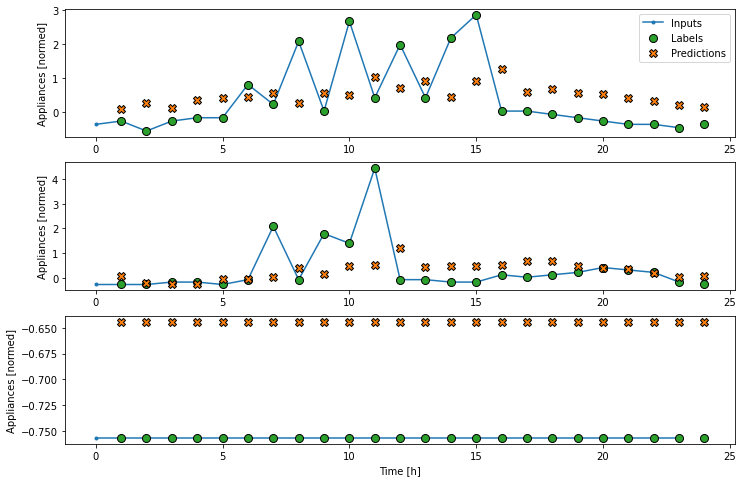

In [ ]:
wide_window.plot(linear)

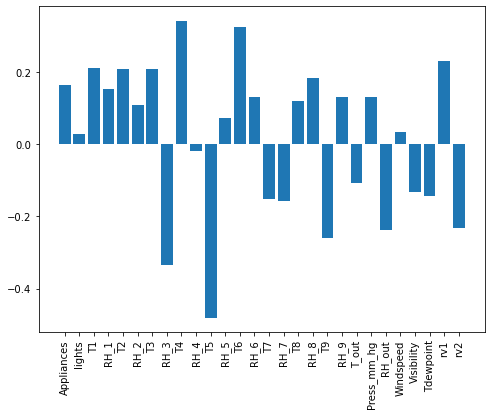

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)
val_performance['Dense']=dense.evaluate(single_step_window.val)
performance['Dense']=dense.evaluate(single_step_window.test,verbose=0)

Epoch 1/20
72/72 [==============================] - 1s 5ms/step - loss: 0.8415 - mean_absolute_error: 0.4906 - val_loss: 0.8287 - val_mean_absolute_error: 0.6117
Epoch 2/20
72/72 [==============================] - 0s 3ms/step - loss: 0.7774 - mean_absolute_error: 0.4627 - val_loss: 0.7756 - val_mean_absolute_error: 0.5279
Epoch 3/20
72/72 [==============================] - 0s 3ms/step - loss: 0.7591 - mean_absolute_error: 0.4491 - val_loss: 0.7622 - val_mean_absolute_error: 0.4934
Epoch 4/20
72/72 [==============================] - 0s 3ms/step - loss: 0.7444 - mean_absolute_error: 0.4480 - val_loss: 0.7468 - val_mean_absolute_error: 0.4733
Epoch 5/20
72/72 [==============================] - 0s 3ms/step - loss: 0.7346 - mean_absolute_error: 0.4382 - val_loss: 0.7888 - val_mean_absolute_error: 0.5632
Epoch 6/20
21/21 [==============================] - 0s 2ms/step - loss: 0.7487 - mean_absolute_error: 0.4711


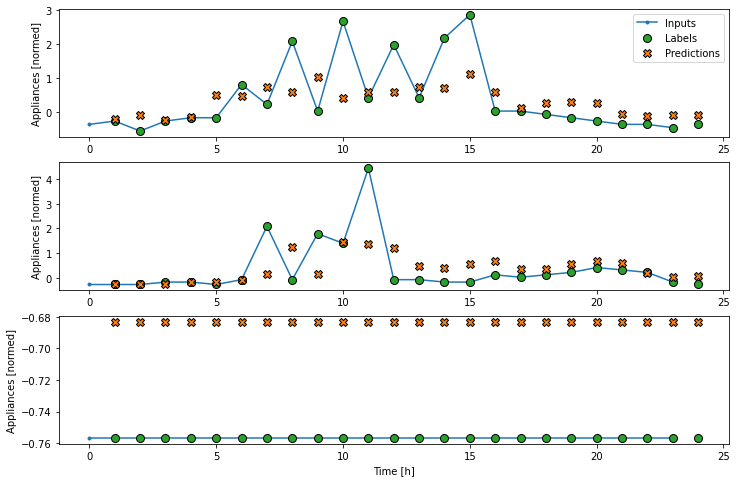

In [ ]:
wide_window.plot(dense)

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Appliances'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Appliances']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

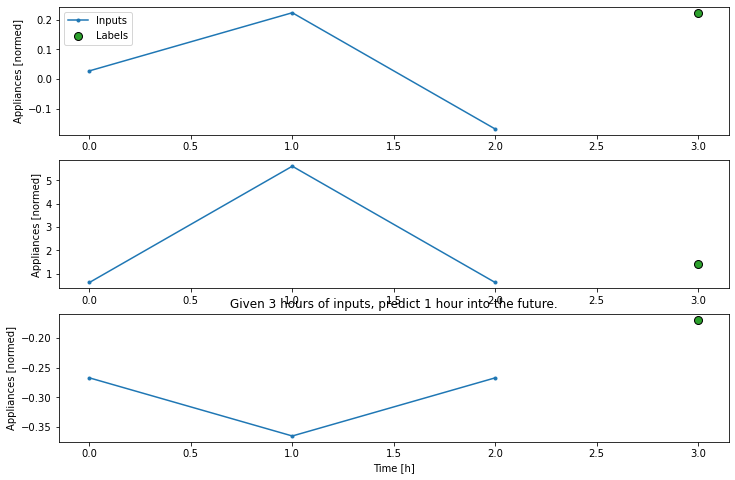

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 28)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

21/21 [==============================] - 0s 1ms/step - loss: 0.7544 - mean_absolute_error: 0.4677


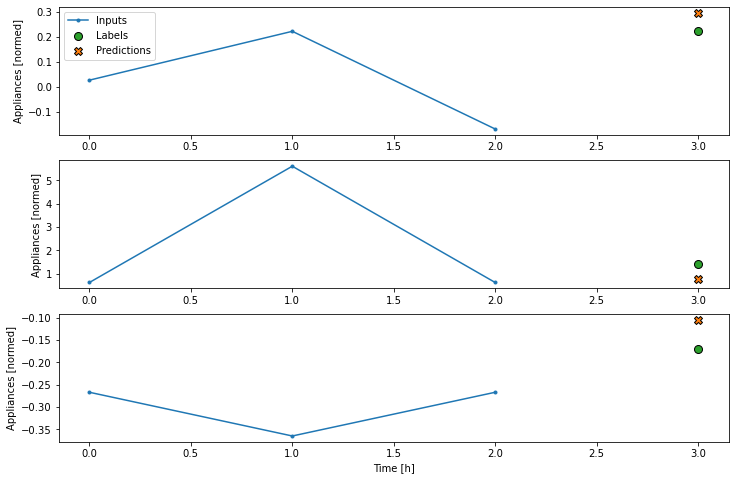

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 28)

ValueError:Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).

Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 84, but received input with shape (32, 672)

Call arguments received by layer "sequential_3" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 28), dtype=float32)
  • training=None
  • mask=None


## Convolution neural network

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'
    ),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 28)
Output shape: (32, 1, 1)


In [ ]:
history=compile_and_fit(conv_model,conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

21/21 [==============================] - 0s 2ms/step - loss: 0.7434 - mean_absolute_error: 0.4344


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Appliances'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Appliances']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 28)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


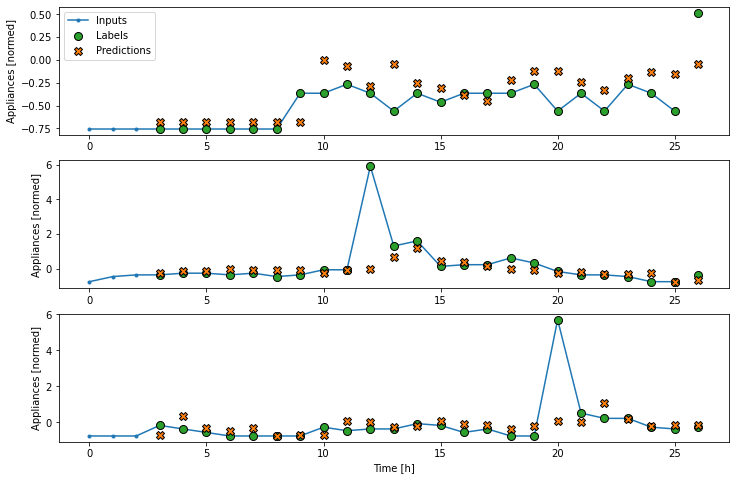

In [ ]:
wide_conv_window.plot(conv_model)

In [ ]:
lstm_model = tf.keras.models.Sequential([
    #Shape [batch, time, features] => [batch,time,lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 28)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test,verbose=0)

20/20 [==============================] - 0s 4ms/step - loss: 0.8463 - mean_absolute_error: 0.5688


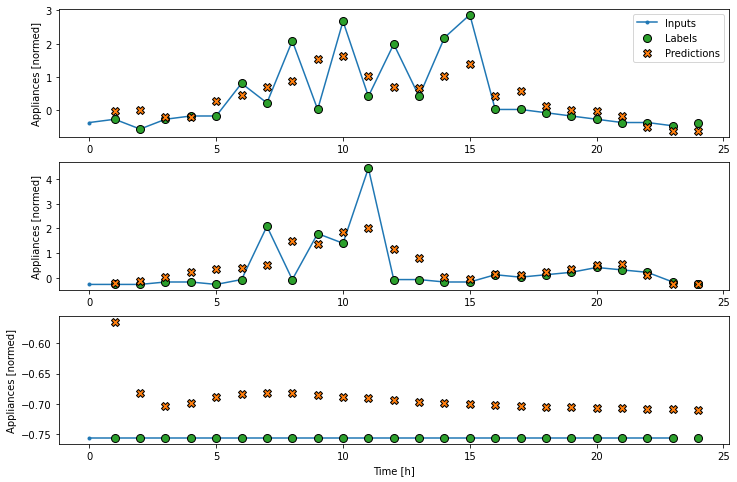

In [ ]:
wide_window.plot(lstm_model)

## Performance

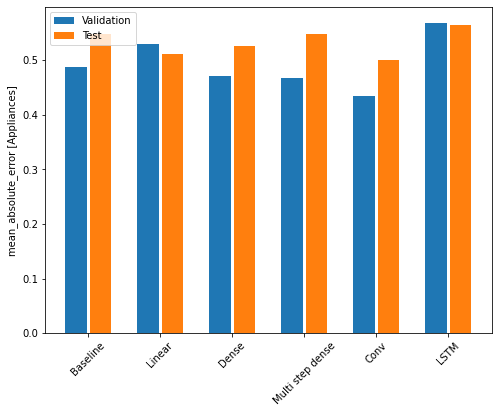

In [ ]:
x  = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index= lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Appliances]')
plt.bar(x-0.17, val_mae, width, label='Validation')
plt.bar(x+0.17,test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_=plt.legend()

In [ ]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5484
Linear      : 0.5117
Dense       : 0.5261
Multi step dense: 0.5484
Conv        : 0.5012
LSTM        : 0.5643
